In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
df = pd.read_csv("C:\\Users\\aswat\\Desktop\\house_price.csv")

In [37]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4,231.00,5,6689
13196,other,4 BHK,3600.0,5,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4,488.00,4,10407


In [38]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  int64  
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 722.0+ KB
None


In [39]:
df.shape

(13200, 7)

In [40]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


## Detect outliers using IQR

In [41]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)
Q1, Q3

(4267.0, 7317.0)

In [42]:
IQR = Q3 - Q1
IQR

3050.0

In [43]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-308.0, 11892.0)

In [44]:
df[(df['price_per_sqft'] < lower_limit) & (df['price_per_sqft'] > upper_limit)] 

,location,size,total_sqft,bath,price,bhk,price_per_sqft


###  Calculate the mean

In [45]:
mean = df['price_per_sqft'].mean()
print("Mean:", mean)

Mean: 7920.336742424242


###  Calculate percentiles

In [46]:
percentiles = np.percentile(df['price_per_sqft'], [25, 50, 75])
print("25th Percentile:", percentiles[0])
print("50th Percentile (Median):", percentiles[1])
print("75th Percentile:", percentiles[2])

25th Percentile: 4267.0
50th Percentile (Median): 5438.0
75th Percentile: 7317.0


In [47]:
Q1 = df['price_per_sqft'].quantile(0.25)
Q3 = df['price_per_sqft'].quantile(0.75)

In [48]:
IQR = Q3 - Q1
print("Interquartile Range (IQR):", IQR)

Interquartile Range (IQR): 3050.0


### normal distribution

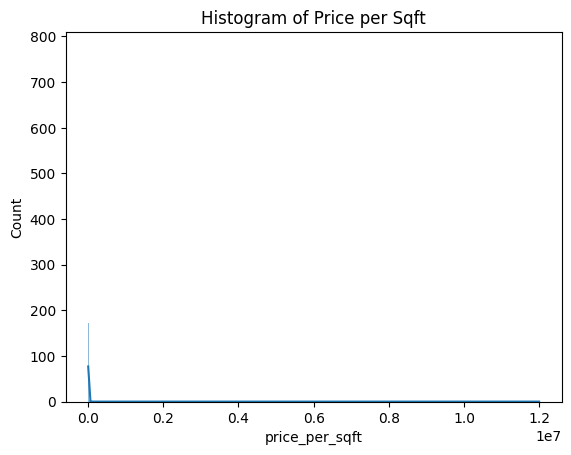

In [32]:
sns.histplot(df['price_per_sqft'], kde=True)
plt.title("Histogram of Price per Sqft")
plt.show()


###  Z-score method

In [49]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250


In [56]:
from scipy import stats

In [57]:
z_scores = np.abs(stats.zscore(df['price_per_sqft']))
threshold = 3

In [58]:
outliers = df['price_per_sqft'][z_scores > threshold]
df = df[~df['price_per_sqft'].isin(outliers)]

### Plot box plots for all numerical columns

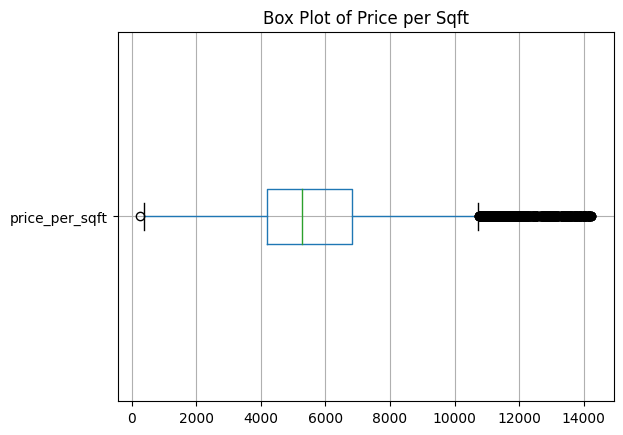

In [59]:
df.boxplot(column=['price_per_sqft'], vert=False)
plt.title("Box Plot of Price per Sqft")
plt.show()

### Plot the histogram to check the normality of the column (price per sqft)

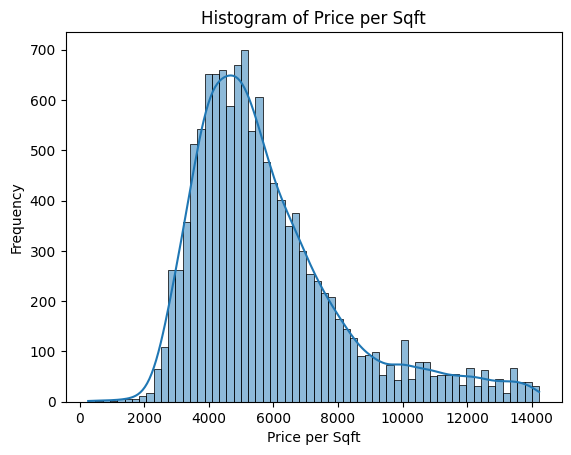

In [60]:
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Histogram of Price per Sqft')
plt.xlabel('Price per Sqft')
plt.ylabel('Frequency')
plt.show()

### Check correlation between numerical columns and plot a heatmap

In [61]:
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase,2 BHK,1056.0,2,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2,51.00,2,4250


In [62]:
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

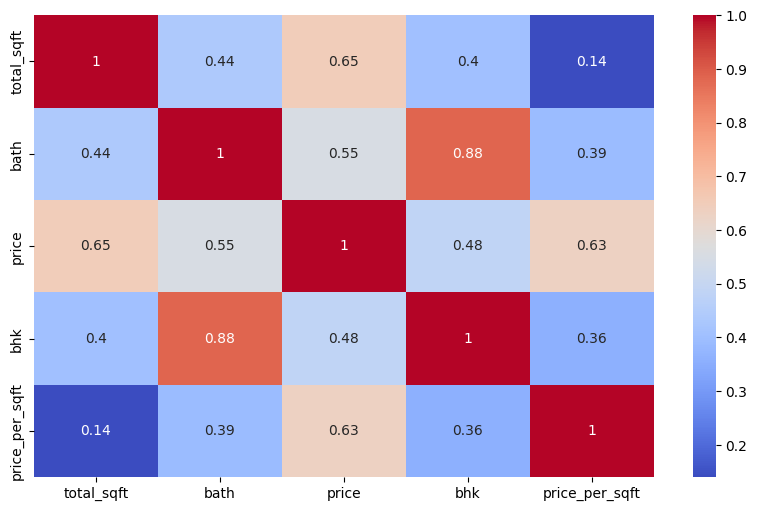

In [63]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

### Plot scatter plots to check the correlation between variables

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

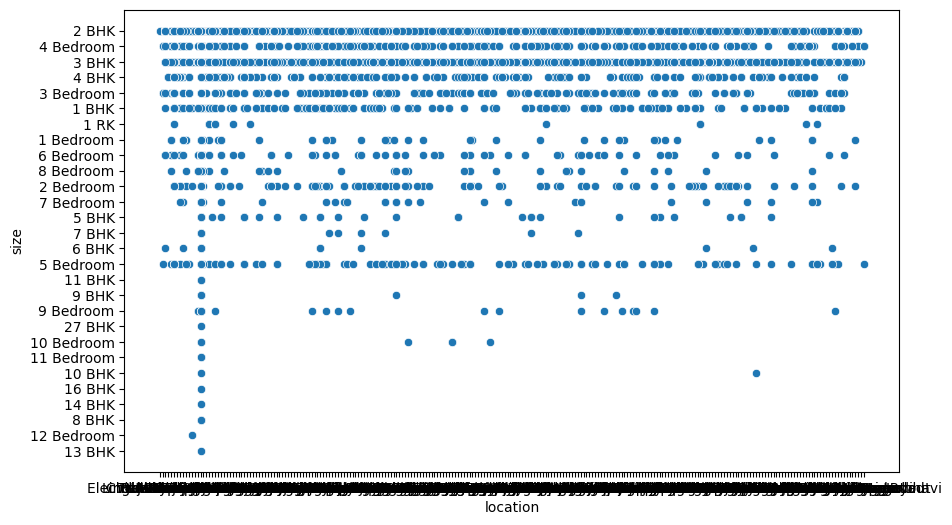

In [69]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='location', y='size')
plt.show()